<a href="https://colab.research.google.com/github/raw-fun/PERSONAL-RESEARCH-CENTER/blob/main/Architectural_BoQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# ১. নতুন জেনারেশনের লাইব্রেরি ইনস্টল
!pip install -U -q google-genai pandas openpyxl
print("✅ ২০২৬ স্ট্যান্ডার্ড 'google-genai' লাইব্রেরি ইনস্টল হয়েছে।")

✅ ২০২৬ স্ট্যান্ডার্ড 'google-genai' লাইব্রেরি ইনস্টল হয়েছে।


In [22]:
from google import genai
from google.colab import userdata
import pandas as pd

# API Key সংগ্রহ
try:
    API_KEY = userdata.get('GEMINI_API_KEY')
    client = genai.Client(api_key=API_KEY)
    MODEL_ID = "gemini-2.0-flash" # আপনার তালিকার সবচেয়ে শক্তিশালী ও ফাস্ট মডেল
    print(f"✅ ক্লায়েন্ট সেটআপ সম্পন্ন। মডেল: {MODEL_ID}")
except Exception as e:
    print(f"❌ এরর: {e}. 'Secrets' এ API Key চেক করুন।")

✅ ক্লায়েন্ট সেটআপ সম্পন্ন। মডেল: gemini-2.0-flash


In [23]:
#@title 🏗️ সুপার অ্যাডভান্সড কনস্ট্রাকশন প্যারামিটার সেট করুন { run: "auto" }

# --- ১. প্রজেক্ট পরিচিতি ও লোকেশন (Project Identity) ---
Project_Name = "Skyline Residency" #@param {type:"string"}
Location_Factor = 1.05 #@param {type:"slider", min:1.0, max:1.2, step:0.05}
Number_of_Floors = 1 #@param {type:"integer"}
Floor_to_Floor_Height_ft = 10 #@param {type:"number"}

# --- ২. সাব-স্ট্রাকচার ও আর্থওয়ার্ক (Earthwork & Foundation) ---
Excavation_Depth_ft = 5 #@param {type:"number"}
Sand_Filling_Volume_cft = 2500 #@param {type:"number"}
Anti_Termite_Area_sqft = 1800 #@param {type:"number"}
Polythene_Sheet_Area_sqft = 2000 #@param {type:"number"}
Brick_Soling_Area_sqft = 1800 #@param {type:"number"}

# --- ৩. স্ট্রাকচারাল ডিটেইলস (RCC & Brickwork) ---
Slab_Area_sqft = 1800 #@param {type:"number"}
Slab_Thickness_inch = 5 #@param {type:"number"}
Beam_Column_Concrete_Ratio = 0.35 #@param {type:"slider", min:0.2, max:0.5, step:0.05}
Wall_5in_Length_ft = 550 #@param {type:"number"}
Wall_10in_Length_ft = 120 #@param {type:"number"}
Mix_Ratio = "1:2:4" #@param ["1:1.5:3", "1:2:4", "1:3:6"]
Rod_Percentage_Avg = 1.6 #@param {type:"slider", min:1.0, max:3.0, step:0.1}

# --- ৪. ওপেনিং ও উডওয়ার্ক (Doors, Windows & Grills) ---
Number_of_Door_Frames = 8 #@param {type:"integer"}
Door_Frame_Type = "Shil Karai" #@param ["Teak", "Shil Karai", "Mahogany"]
Number_of_Windows = 12 #@param {type:"integer"}
Window_Type = "Thai Aluminum (5mm)" #@param ["Thai Aluminum (5mm)", "Thai Aluminum (6mm)", "Steel Sash"]
Grill_Weight_kg = 850 #@param {type:"number"}

# --- ৫. প্লাম্বিং, স্যানিটারি ও ইলেকট্রিক্যাল (MEP) ---
Sanitary_Fixtures_Count = 10 #@param {type:"integer"}
Water_Tank_Capacity_Litre = 5000 #@param {type:"number"}
Electrical_Points_Count = 45 #@param {type:"integer"}
Safety_Devices_DB_Box = True #@param {type:"boolean"}

# --- ৬. অ্যাডভান্সড ফিনিশিং (Extra Finishing) ---
Skirting_Running_ft = 400 #@param {type:"number"}
False_Ceiling_Area_sqft = 500 #@param {type:"number"}
Exterior_Weather_Coat_sqft = 3500 #@param {type:"number"}
Kitchen_Cabinet_Running_ft = 15 #@param {type:"number"}

# --- ৭. বাজার দর ও প্রফেশনাল চার্জ (Financials) ---
Price_Cement = 580 #@param {type:"number"}
Price_Brick_per_k = 13500 #@param {type:"number"}
Price_Rod_per_ton = 98000 #@param {type:"number"}
Labor_Rate_Civil_sqft = 260 #@param {type:"number"}

Consultancy_Fee_Percent = 3 #@param {type:"number"}
Contractor_Profit_OHP_Percent = 10 #@param {type:"number"}
Contingency_Percent = 5 #@param {type:"number"}
Utility_Lump_Sum = 25000 #@param {type:"number"}

In [24]:
def calculate_estimates(area, thick, w5, w10, ratio):
    try:
        # ১. কনক্রিট ক্যালকুলেশন
        thickness_ft = thick / 12
        wet_vol = area * thickness_ft
        dry_vol = wet_vol * 1.54 # Standard Dry Volume factor

        parts = [float(p) for p in ratio.split(':')]
        sum_parts = sum(parts)

        # সিমেন্ট: (Ratio/Sum) * (Dry Volume / Bag Volume)
        cement_bags = (parts[0] / sum_parts) * dry_vol / 1.25
        sand_cft = (parts[1] / sum_parts) * dry_vol
        chips_cft = (parts[2] / sum_parts) * dry_vol

        # ২. রড (১.২% রড ক্যালকুলেশন)
        rod_kg = wet_vol * 0.0283168 * 7850 * 0.012

        # ৩. ইটের কাজ (১০ ফিট দেয়াল উচ্চতা ধরে)
        bricks = (w5 * 10 * 5) + (w10 * 10 * 10)

        return {
            "Cement": round(cement_bags),
            "Sand": round(sand_cft),
            "Chips": round(chips_cft),
            "Bricks": round(bricks),
            "Rod": round(rod_kg)
        }
    except Exception as e:
        return f"Error in calculation: {str(e)}"

# ফাংশন কল করার সময় সঠিক ভেরিয়েবল পাস করা হচ্ছে
try:
    estimates = calculate_estimates(
        Slab_Area_sqft,
        Slab_Thickness_inch,
        Wall_5in_Length_ft,
        Wall_10in_Length_ft, # এখানে নাম সংশোধন করা হয়েছে
        Mix_Ratio
    )

    if isinstance(estimates, dict):
        print(f"📊 {Project_Name}-এর জন্য ক্যালকুলেশন সফলভাবে সম্পন্ন হয়েছে!")
        print(f"সিমেন্ট: {estimates['Cement']} ব্যাগ, ইট: {estimates['Bricks']} টি।")
    else:
        print(f"❌ সমস্যা হয়েছে: {estimates}")

except NameError as e:
    print(f"❌ এরর: ভেরিয়েবল খুঁজে পাওয়া যাচ্ছে না। দয়া করে ৩ নম্বর সেলটি আবার রান করুন। ({e})")

📊 Skyline Residency-এর জন্য ক্যালকুলেশন সফলভাবে সম্পন্ন হয়েছে!
সিমেন্ট: 132 ব্যাগ, ইট: 39500 টি।


In [25]:
import time

# আপনার লিস্ট অনুযায়ী সঠিক মডেল আইডিগুলো
# 'models/' প্রিফিক্স বাদ দিয়ে শুধু আইডি ব্যবহার করলে 404 আসার সম্ভাবনা কমে যায়
MODELS_TO_TRY = [
    "gemini-2.0-flash",
    "gemini-2.0-flash-lite",
    "gemini-flash-latest", # এটি ১.৫ ফ্ল্যাশের লেটেস্ট ভার্সন
    "gemini-1.5-flash"
]

def get_final_boq_audit(project_name, cement, bricks, rod, ratio):
    audit_prompt = f"""
    Role: Senior Civil Engineer.
    Project: {project_name}
    Materials: {cement} bags cement, {bricks} bricks, {rod} kg rod.
    Mix: {ratio}.
    Task: Provide a 3-point construction audit in Bengali. Focus on quality and cost saving.
    """

    for model_id in MODELS_TO_TRY:
        try:
            print(f"🔄 {model_id} দিয়ে চেষ্টা করছি...")
            response = client.models.generate_content(
                model=model_id,
                contents=audit_prompt
            )
            return f"✅ (মডেল: {model_id} ব্যবহার করা হয়েছে)\n\n{response.text}"

        except Exception as e:
            err_msg = str(e)
            if "429" in err_msg:
                print(f"⚠️ {model_id}-এর কোটা শেষ।")
                time.sleep(2) # সামান্য বিরতি
                continue
            elif "404" in err_msg:
                print(f"⚠️ {model_id} খুঁজে পাওয়া যায়নি (404)। পরবর্তী মডেলে যাচ্ছি...")
                continue
            else:
                print(f"❌ একটি অজানা এরর হয়েছে ({model_id}): {err_msg}")
                continue

    return "❌ দুঃখিত, বর্তমানে কোনো মডেলই রেসপন্স দিচ্ছে না। ১০ মিনিট পর আবার চেষ্টা করুন।"

# অডিট রান করা
if 'estimates' in globals():
    print("⏳ প্রফেশনাল রিপোর্ট জেনারেট হচ্ছে...")
    final_audit = get_final_boq_audit(
        Project_Name,
        estimates['Cement'],
        estimates['Bricks'],
        estimates['Rod'],
        Mix_Ratio
    )
    print("\n🤖 AI ইঞ্জিনিয়ার অডিট রিপোর্ট:\n")
    print("-" * 50)
    print(final_audit)
else:
    print("❌ আগে ক্যালকুলেশন সেলটি রান করুন!")

⏳ প্রফেশনাল রিপোর্ট জেনারেট হচ্ছে...
🔄 gemini-2.0-flash দিয়ে চেষ্টা করছি...
⚠️ gemini-2.0-flash-এর কোটা শেষ।
🔄 gemini-2.0-flash-lite দিয়ে চেষ্টা করছি...
⚠️ gemini-2.0-flash-lite-এর কোটা শেষ।
🔄 gemini-flash-latest দিয়ে চেষ্টা করছি...

🤖 AI ইঞ্জিনিয়ার অডিট রিপোর্ট:

--------------------------------------------------
✅ (মডেল: gemini-flash-latest ব্যবহার করা হয়েছে)

**ভূমিকা:**
স্কাইলাইন রেসিডেন্সি প্রকল্পের চলমান নির্মাণ কাজের মান, সুরক্ষা এবং খরচ সাশ্রয়ের দিকগুলি নিশ্চিত করতে নিম্নলিখিত নির্মাণ নিরীক্ষা (Construction Audit) প্রতিবেদনটি পেশ করা হলো। ১:২:৪ মিক্স এবং প্রদত্ত উপাদান (১৩২ বস্তা সিমেন্ট, ৩৯,৫০০ ইট, ২০০১ কেজি রড) এর সর্বোত্তম ব্যবহার নিশ্চিত করতে হবে।

---

## নির্মাণ নিরীক্ষা প্রতিবেদন - স্কাইলাইন রেসিডেন্সি
**(Construction Audit Report - Skyline Residency)**

### পদ: সিনিয়র সিভিল ইঞ্জিনিয়ার
### তারিখ: [আজকের তারিখ]

---

### নিরীক্ষা ১: কংক্রিট মিক্সের গুণমান ও ব্যাচিং নিয়ন্ত্রণ (Quality Focus)

নির্মাণ কাজের শক্তি এবং স্থায়িত্ব সরাসরি ১:২:৪ মিক্স অনুপাতের নির্ভুলতার উপর ন

/tmp/ipython-input-3921755042.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cost', y='Item', data=mat_df, palette="Blues_d", ax=ax2)
/tmp/ipython-input-3921755042.py:87: UserWarning: Glyph 2547 (\N{BENGALI RUPEE SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-3921755042.py:87: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2547 (\N{BENGALI RUPEE SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)


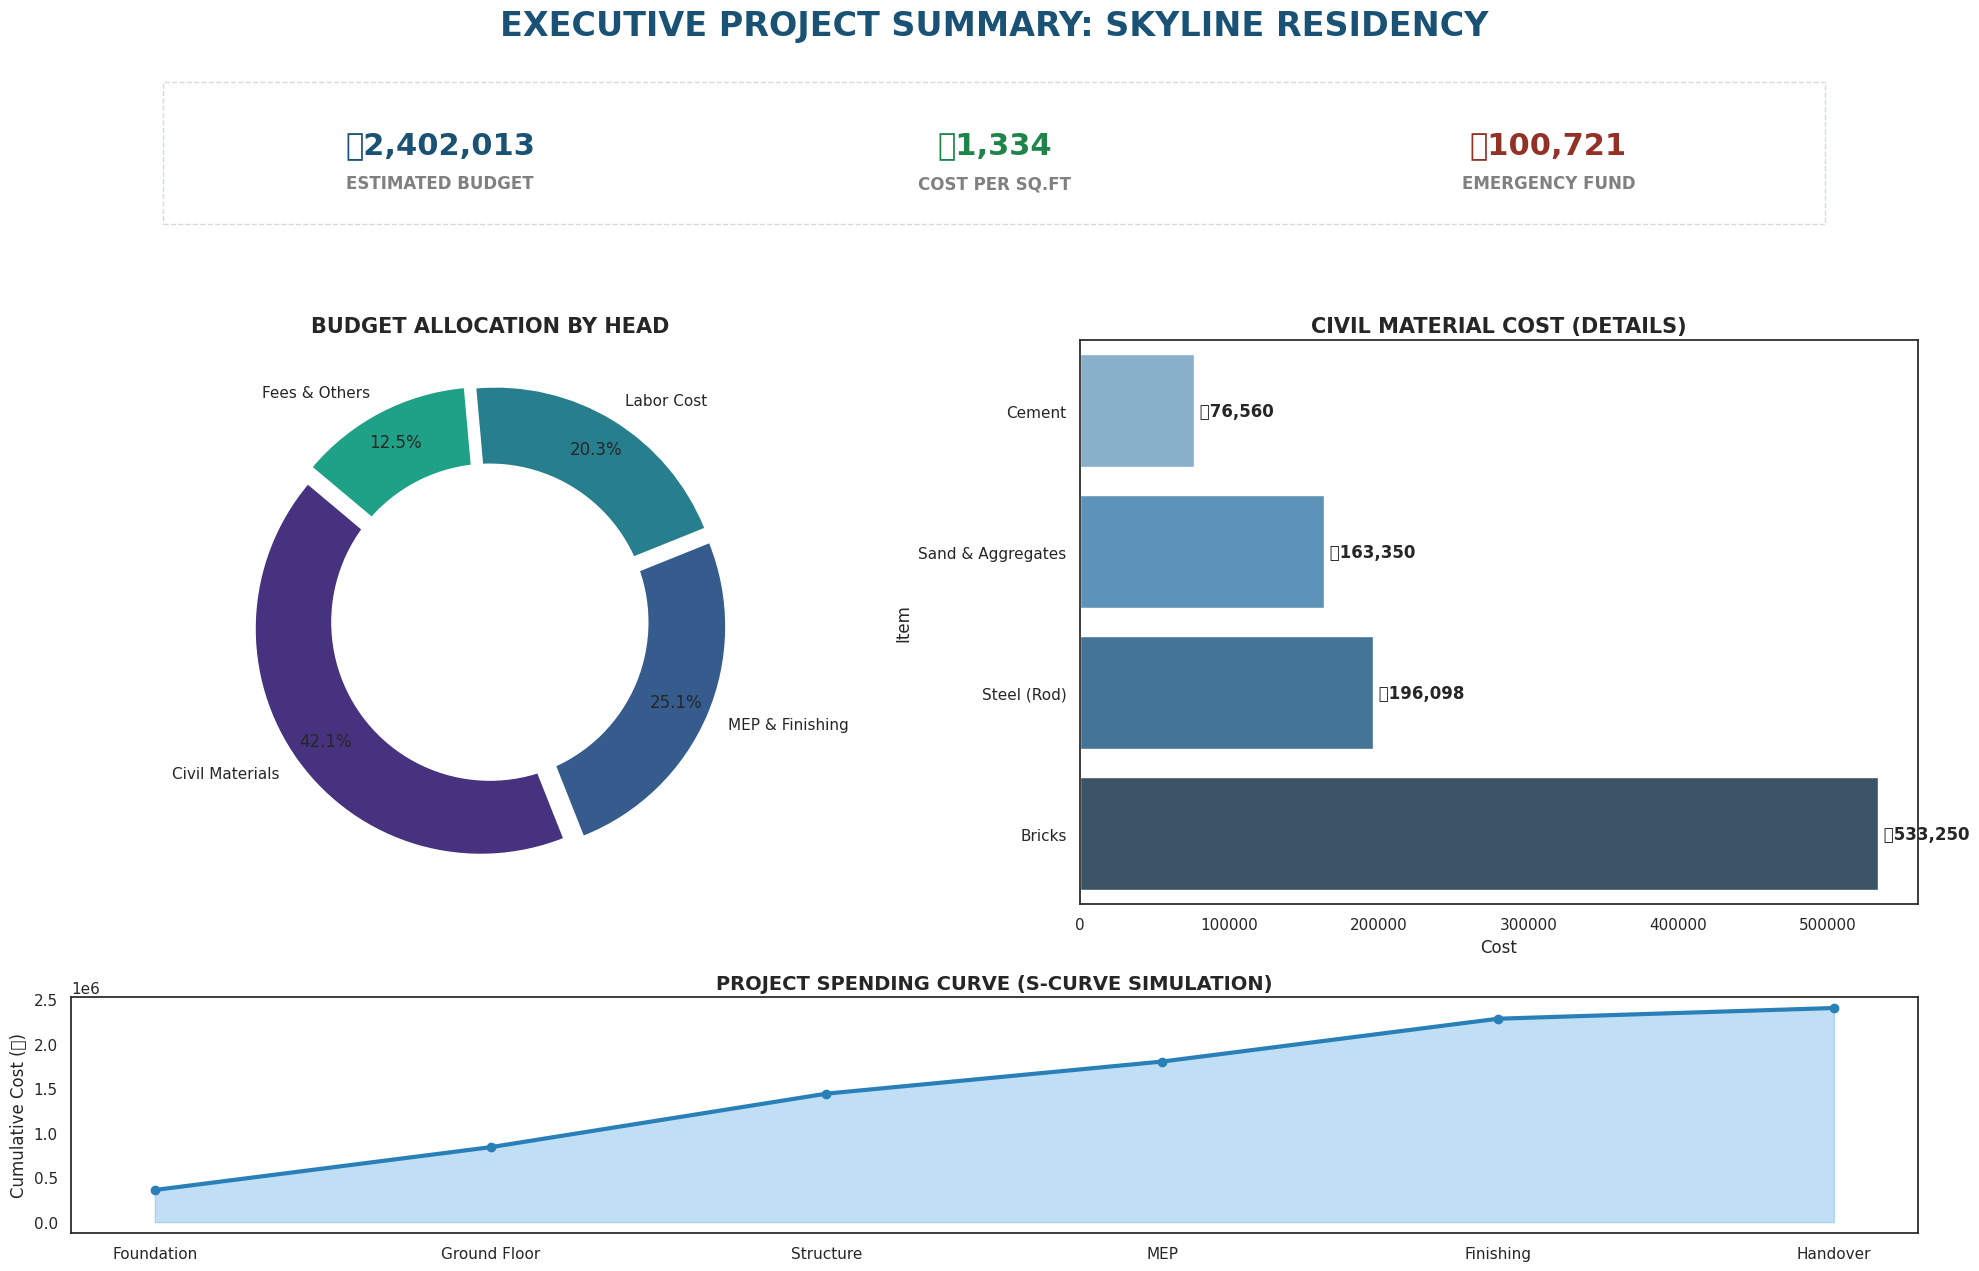

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def show_enterprise_dashboard(est, p_cement, p_brick, p_rod, p_name):
    # --- ডাটা প্রিপারেশন ---
    # ৩ নম্বর সেলের অ্যাডভান্সড প্যারামিটারগুলো থেকে খরচ ক্যালকুলেশন
    civil_costs = {
        "Cement": est['Cement'] * Price_Cement,
        "Bricks": est['Bricks'] * (Price_Brick_per_k / 1000),
        "Steel (Rod)": est['Rod'] * (Price_Rod_per_ton / 1000),
        "Sand & Aggregates": est['Sand'] * Price_Sand_per_cft + est['Chips'] * Price_Stone_per_cft,
    }

    # অতিরিক্ত প্রফেশনাল খরচ
    finishing_mep_costs = {
        "Finishing & Tiles": (Slab_Area_sqft * (Tiles_Area_Percentage/100)) * 150, # 150 BDT/sqft avg
        "MEP (Elect/Plumb)": (Slab_Area_sqft * Labor_Rate_Civil_sqft) * (Electrical_Plumbing_Percent/100),
        "Woodwork & Openings": Number_of_Door_Frames * 12000 + Number_of_Windows * 8500 + Grill_Weight_kg * 110
    }

    # লেবার ও ইনডাইরেক্ট কস্ট
    labor_total = Slab_Area_sqft * Labor_Rate_Civil_sqft * Number_of_Floors
    sub_total = sum(civil_costs.values()) + sum(finishing_mep_costs.values()) + labor_total

    ohp_amount = sub_total * (Contractor_Profit_OHP_Percent / 100)
    consultancy_amount = sub_total * (Consultancy_Fee_Percent / 100)
    contingency_amount = sub_total * (Contingency_Percent / 100)

    grand_total = sub_total + ohp_amount + consultancy_amount + contingency_amount + Utility_Lump_Sum
    cost_per_sqft = grand_total / (Slab_Area_sqft * Number_of_Floors)

    # --- ভিজ্যুয়ালাইজেশন সেটিংস ---
    plt.rcParams['font.family'] = 'sans-serif'
    sns.set_style("white")
    fig = plt.figure(figsize=(20, 14))
    gs = fig.add_gridspec(4, 4)

    # ১. টপ হেডার ও KPI কার্ডস
    ax0 = fig.add_subplot(gs[0, :])
    ax0.axis('off')
    ax0.text(0.5, 0.9, f"EXECUTIVE PROJECT SUMMARY: {p_name.upper()}", ha='center', fontsize=24, fontweight='bold', color='#1a5276')

    # ৩টি প্রধান KPI বক্স
    kpi_metrics = [
        (f"৳{grand_total:,.0f}", "ESTIMATED BUDGET", "#1a5276"),
        (f"৳{cost_per_sqft:,.0f}", "COST PER SQ.FT", "#1e8449"),
        (f"৳{contingency_amount:,.0f}", "EMERGENCY FUND", "#943126")
    ]

    for i, (val, label, col) in enumerate(kpi_metrics):
        ax0.text(0.2 + i*0.3, 0.4, val, ha='center', fontsize=22, fontweight='bold', color=col)
        ax0.text(0.2 + i*0.3, 0.25, label, ha='center', fontsize=12, fontweight='bold', color='gray')
    ax0.add_patch(plt.Rectangle((0.05, 0.1), 0.9, 0.6, fill=False, edgecolor='#d5dbdb', lw=1, ls='--'))

    # ২. ডোনাট চার্ট: বাজেট অ্যালোকেশন (Major Heads)
    ax1 = fig.add_subplot(gs[1:3, 0:2])
    heads = {
        "Civil Materials": sum(civil_costs.values()),
        "MEP & Finishing": sum(finishing_mep_costs.values()),
        "Labor Cost": labor_total,
        "Fees & Others": ohp_amount + consultancy_amount + Utility_Lump_Sum
    }
    ax1.pie(heads.values(), labels=heads.keys(), autopct='%1.1f%%', startangle=140,
            colors=sns.color_palette("viridis"), pctdistance=0.85, explode=[0.05]*4)
    ax1.add_artist(plt.Circle((0,0), 0.70, fc='white'))
    ax1.set_title("BUDGET ALLOCATION BY HEAD", fontsize=15, fontweight='bold')

    # ৩. বার চার্ট: ম্যাটেরিয়াল কস্ট ব্রেকডাউন
    ax2 = fig.add_subplot(gs[1:3, 2:4])
    mat_df = pd.DataFrame(list(civil_costs.items()), columns=['Item', 'Cost']).sort_values('Cost')
    sns.barplot(x='Cost', y='Item', data=mat_df, palette="Blues_d", ax=ax2)
    ax2.set_title("CIVIL MATERIAL COST (DETAILS)", fontsize=15, fontweight='bold')
    for i, v in enumerate(mat_df['Cost']):
        ax2.text(v, i, f" ৳{v:,.0f}", va='center', fontweight='bold')

    # ৪. লাইন গ্রাফ/এরিয়া চার্ট: কস্ট ডেনসিটি (Cumulative Simulation)
    ax3 = fig.add_subplot(gs[3, :])
    stages = ['Foundation', 'Ground Floor', 'Structure', 'MEP', 'Finishing', 'Handover']
    progress_costs = np.cumsum([0.15, 0.20, 0.25, 0.15, 0.20, 0.05]) * grand_total
    ax3.fill_between(stages, progress_costs, color='#3498db', alpha=0.3)
    ax3.plot(stages, progress_costs, marker='o', color='#2980b9', lw=3)
    ax3.set_title("PROJECT SPENDING CURVE (S-CURVE SIMULATION)", fontsize=14, fontweight='bold')
    ax3.set_ylabel("Cumulative Cost (৳)")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ড্যাশবোর্ড জেনারেট করা
if 'estimates' in globals():
    show_enterprise_dashboard(estimates, Price_Cement, Price_Brick_per_k, Price_Rod_per_ton, Project_Name)